# Thermodynamics of Liquids and Crystals

The thermodynamic quantities of the liquid and crystal phases
are important for understanding the rates of attachment to the interface.
This notebook provides a look at
the thermodynamic properties of the liquid and crystal phases.

The thermodynamics of the liquid phase
are taken from the production runs of the dynamics simulations,
while the thermodynamic properties of the crystal phase
are generated specifically in the `thermodynamics` simulation directory.

In [1]:
import pandas
from pathlib import Path
import itertools

import altair.vegalite.v2 as alt

from sdanalysis.util import get_filename_vars

In [2]:
dir_crystal = Path("../data/simulations/thermodynamics/output")
dir_liquid = Path("../data/simulations/dynamics/output")

dfs = []

for filename in itertools.chain(
    dir_crystal.glob("thermo*.log"),
    dir_liquid.glob("thermo*.log"),
):
    fvars = get_filename_vars(filename)

    df = pandas.read_csv(filename, sep='\t')
    df = df.drop_duplicates('timestep', keep='last')
    df = df.div(df.N, axis=0)
    
    df["pressure"]  = fvars.pressure
    if fvars.crystal is not None:
        df["crystal"] = fvars.crystal
    else:
        df["crystal"] = "liquid"
    
    df["temperature"] = fvars.temperature
    df = df.set_index(["pressure", "temperature", "crystal"])
    dfs.append(df.mean(level=[0,1,2]))


df_thermo = pandas.concat(dfs)

In [3]:
def energy_diff(df, pressure, temperature, crystal):
    return (
        df.loc[(pressure, temperature, crystal), "potential_energy"] - 
        df.loc[(pressure, temperature, 'liquid'), "potential_energy"]
    )

In [4]:
energy_diff(df_thermo, '1.00', '0.36', 'p2')

-0.18034612159032992

In [5]:
energy_diff(df_thermo, '13.50', '1.35', 'p2')

-0.06561802006526474

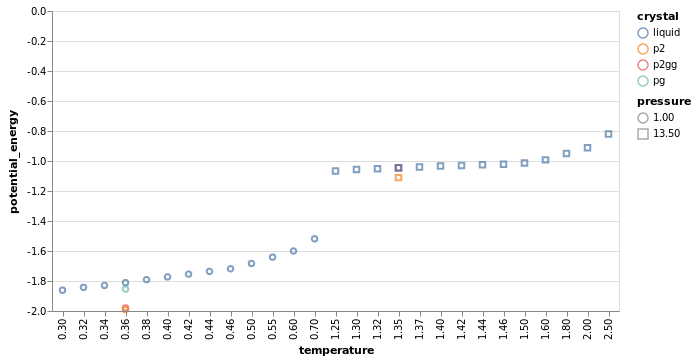

In [6]:
alt.Chart(df_thermo.reset_index()).mark_point().encode(
    x='temperature',
    y='potential_energy',
    color='crystal',
    shape='pressure',
)